In [55]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import Parallel, delayed
from tqdm.notebook import tqdm

# EEG

In [18]:
root = Path("../data/Dataset/Samples/")


def get_filepaths(root, modality):
    paths = root.glob(f"*/{modality}/*.csv")
    return paths


def get_eeg_quality_scores(path):
    df = pd.read_csv(path)
    return df["EQ.OVERALL"].mean()

In [19]:
eeg_qualities = Parallel(n_jobs=-1)(
    delayed(get_eeg_quality_scores)(path) for path in tqdm(get_filepaths(root, "EEG"))
)

0it [00:00, ?it/s]

In [152]:
def plot_cdf(scores, label=None):
    x = np.linspace(0, 100, 1000)
    y = [sum(score >= threshold for score in scores) for threshold in x]
    
    sns.lineplot(x=x, y=y, label=label)
    plt.xlabel('Min Quality Threshold')
    plt.ylabel('Count of scores ≥ threshold')
    plt.title('Cumulative Distribution')
    plt.grid(True)

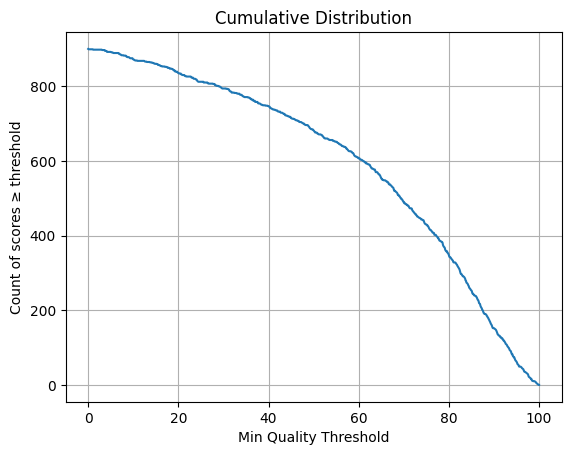

In [153]:
plot_cdf(eeg_qualities)

# HR

In [154]:
def get_hr_quality_scores(path):
    return 100 * pd.read_csv(path).Confidence.mean()/3

In [155]:
hr_qualities = Parallel(n_jobs=-1)(
    delayed(get_hr_quality_scores)(path) for path in tqdm(get_filepaths(root, "HR"))
)

0it [00:00, ?it/s]

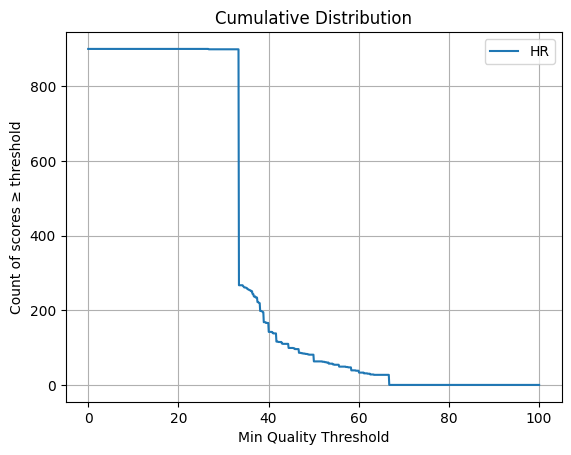

In [156]:
plot_cdf(hr_qualities, label="HR")

# Eye

In [157]:
def get_eye_quality_scores(path):
    return 100 * pd.read_csv(path).FPOGV.mean()

In [158]:
eye_qualities = Parallel(n_jobs=-1)(
    delayed(get_eye_quality_scores)(path) for path in tqdm(get_filepaths(root, "EYE"))
)

0it [00:00, ?it/s]

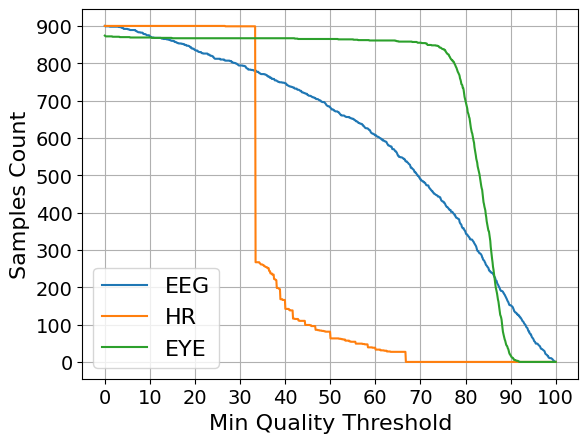

In [160]:
plot_cdf(eeg_qualities, label="EEG")
plot_cdf(hr_qualities, label="HR")
plot_cdf(eye_qualities, label="EYE")
plt.title(None)
plt.xlabel("Min Quality Threshold", fontsize=16)
plt.xticks(np.arange(0, 101, 10), fontsize=14)
plt.yticks(np.arange(0, 901, 100), fontsize=14)
plt.ylabel("Samples Count", fontsize=16)
plt.legend(fontsize=16)
plt.savefig("../results/figures/quality_cdf.pdf", bbox_inches="tight")